In [ ]:
#Imports Below
import pandas as pd
import numpy as np
import operator
import random
import io
import math
import graphviz
!pip install gplearn
from gplearn.genetic import SymbolicRegressor
from gplearn.functions import make_function
from sympy import *
import matplotlib
from google.colab import files
from google.colab import drive

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
drive.mount("/content/drive", force_remount=True)
#Uploading Datasets

IntxnStr=pd.read_csv('/content/drive/Shareddrives/Capstone Drive/MLTesting/Datasets/ExpPatch_IntxnStr.csv')
PatchTidalHeights=pd.read_csv('/content/drive/Shareddrives/Capstone Drive/MLTesting/Datasets/ExpPatch_PatchTidalHeights.csv')
PhotoCounts=pd.read_csv('/content/drive/Shareddrives/Capstone Drive/MLTesting/Datasets/ExpPatch_PhotoCounts.csv')
QuadLocations=pd.read_csv('/content/drive/Shareddrives/Capstone Drive/MLTesting/Datasets/ExpPatch_QuadLocations.csv')
TempsCleaned=pd.read_csv('/content/drive/Shareddrives/Capstone Drive/MLTesting/Datasets/ExpPatch_TempsCleaned.csv')
X_train=pd.read_csv('/content/drive/Shareddrives/Capstone Drive/MLTesting/Datasets/relevant_X_train.csv')
y_train=pd.read_csv('/content/drive/Shareddrives/Capstone Drive/MLTesting/Datasets/MytilusLOG.csv')
timeseries = pd.read_csv('/content/drive/Shareddrives/Capstone Drive/MLTesting/Datasets/time.csv')

Mounted at /content/drive


In [ ]:
#Converter library for simplifying function
converter = {
    'sub': lambda x, y : x - y,
    'div': lambda x, y : x/y,
    'mul': lambda x, y : x*y,
    'add': lambda x, y : x + y,
    'neg': lambda x    : -x,
    'pow': lambda x, y : x**y,
    'inv': lambda x: 1/x,
    'sqrt': lambda x: x**0.5,
    'pow_3': lambda x: x**3,
    'sin': lambda x: sin(x),
    'cos': lambda x: cos(x)
}

In [ ]:
#Prepare training data by selecting the columns to be included
X_train = X_train.iloc[:, 1:len(X_train.columns)]
print(X_train)

#Select function set for symbolic regression
function_set = ['add', 'sub', 'mul', 'div', 'neg','inv']
#,'cos','sin','neg','inv'

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


   0    14.78      2.12486e+21       14        0.0119241        0.0422989    167.19m
   1    12.05      1.18931e+18       21        0.0118788        0.0426049    129.64m
   2    12.88      6.39943e+12       20        0.0112163        0.0299336    114.42m
   3    12.22      4.40491e+06       41        0.0110277        0.0270048    121.63m
   4    13.20          27943.1       12        0.0109163        0.0290148    189.29m
   5    15.47           216354       33        0.0104526        0.0316457    288.03m
   6    17.92          475.621       14        0.0104746        0.0374155    245.96m
   7    19.51           202378       12        0.0100507        0.0361691    358.43m
   8    20.54          89.0295       14       0.00975041        0.0372284    364.31m
   9    22.50          159.375       39        0.0101927        0.0348566    285.66m
  10    23.12          1815.72       41        0.0104627        0.0335312    392.91m
  11    23.57          216.865       34       0.00980618        0

/usr/local/lib/python3.7/dist-packages/sympy/core/sympify.py:463: SymPyDeprecationWarning: 

String fallback in sympify has been deprecated since SymPy 1.6. Use
sympify(str(obj)) or sympy.core.sympify.converter or obj._sympy_
instead. See https://github.com/sympy/sympy/issues/18066 for more
info.

  deprecated_since_version='1.6'


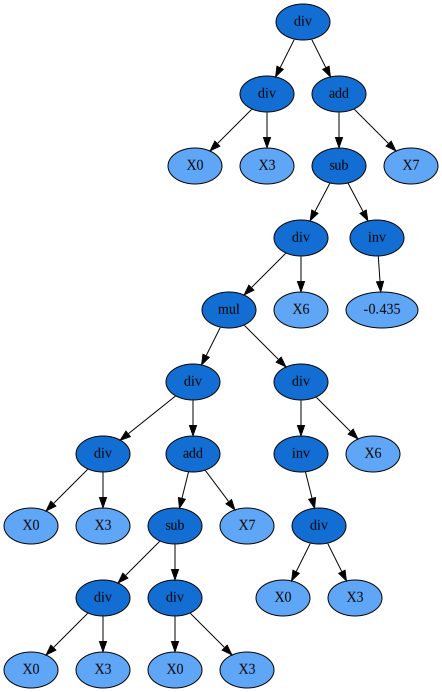

In [ ]:
#Symbolic Regression Parameters
est_gp = SymbolicRegressor(population_size=1000, 
generations=10000, stopping_criteria=.0097, 
p_crossover=0.8, p_subtree_mutation=0.05, function_set=function_set,
p_hoist_mutation=0.01, 
p_point_mutation=0.1,
max_samples=0.90, verbose=1,
parsimony_coefficient=.00001, random_state=0)

#Run Symbolic Regressor; Output model, R2 value, and simplified equation
est_gp.fit(X_train, y_train)
print(est_gp._program)
print('R2:',est_gp.score(X_train,y_train))
next_e = simplify(sympify(est_gp._program, locals=converter))
print(next_e)

#Generate tree structure of equation
dot_data = est_gp._program.export_graphviz()
graph = graphviz.Source(dot_data)
graph.render('images/ex1', format='png', cleanup=True)
graph

In [ ]:
#Simplifies equations that are inputted manually
eq = "-X4 - 1.34269820575239/(1.15874855156431/X7 - X5/X3) + 1.55584960110358*X4*(X1 + 1.15874855156431/(X7*(X5*(0.863 + 1.15874855156431/X7) - 0.744769)))/(X3*X8) + X5/X3"
next_e = sympify(eq, locals=converter)
print(next_e)

-X4 - 1.34269820575239/(1.15874855156431/X7 - X5/X3) + 1.55584960110358*X4*(X1 + 1.15874855156431/(X7*(X5*(0.863 + 1.15874855156431/X7) - 0.744769)))/(X3*X8) + X5/X3


0             inf
1      316.280000
2     1290.000000
3             inf
4             inf
5             inf
6             inf
7             inf
8        0.622449
9             inf
10            inf
11            inf
12            inf
13            inf
14            inf
15            inf
16            inf
17            inf
18            inf
19            inf
20            inf
21            inf
22            inf
23            inf
24            inf
25            inf
26            inf
27            inf
28            inf
29            inf
30            inf
31            inf
32            inf
33            inf
34            inf
35            inf
dtype: float64


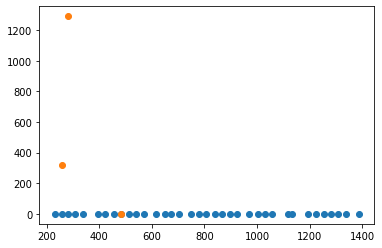

In [ ]:
#Plots time vs growth rate for original data and new model to compare
X0 = X_train.iloc[:, 1]
X1 = X_train.iloc[:, 2]
X2 = X_train.iloc[:, 3]
X3 = X_train.iloc[:, 4]
X4 = X_train.iloc[:, 5]
X5 = X_train.iloc[:, 6]
X6 = X_train.iloc[:, 7]
X7 = X_train.iloc[:, 8]
X8 = X_train.iloc[:, 9]
pred_y = (X8 + (X2 + X8)/X0)/X6**2
print(pred_y)
matplotlib.pyplot.scatter(timeseries, y_train)
matplotlib.pyplot.scatter(timeseries, pred_y)
matplotlib.pyplot.show()
